# Common Machine Learning APIs in Scikit-learn

Most of the machine learning models (i.e. classifier or regressors) in Scikit-learn have the following APIs:
* MODEL_NAME(param1, param2, ...): It is the constructor of the model class and is used to instantiate the model object. The hyper-parameters are passed as the parameters of the contructor.
Ex. __model = sklearn.linear_model.LinearRegression (fit_intercept=True)__

* MODEL_OBJECT.fit(X, y): This API is called to train the model. The feature matrix X and the target labels y is passed as the parameters of the API call.
Ex. __model.fit(X, y)__

* MODEL_OBJECT.predict(X'): This API is called to get the prediction for a set of test data X'. It should be called once the model is trained.
Ex. __y_hat = model.predict(X')__

* MODEL_OBJECT.score(X', y'): This API is used to get prediction scores (i.e. coefficient of determination for regression and average accuracy for classification) for a test data X' and its corresponding label y'. It also should be called once the model is trained.
Ex. __scores = model.score(X', y')__

Additionally, sklearn also provides some common APIs such as get_params(), set_params() etc.

# Linear Regression

Remember that linear regression fits a linear model with coefficients $\mathbf{w} = (w_1, w_2, \ldots, w_p)$ and intercept $w_0$ to minimize the sum-squared-error between the observed target and the target predicted by the linear model. Mathematically, it solves the follwing problem:
$$\underset{\mathbf{w}, w_0}{\text{min}}\quad ||\mathbf{y} - X\mathbf{w} - w_0\mathbf{1}||_2^2$$ where $\mathbf{1}$ is a column vetor of all ones of the same dimension of $\mathbf{y}$. Once, the training is done, the prediction for a new example $\tilde{\mathbf{x}}=(\tilde{x}_1, \tilde{x}_2, \ldots, \tilde{x}_{p})$ is done as $\tilde{\mathbf{x}}^T\mathbf{w}^*+w_0^* = \sum_{i=1}^p x_iw_i^* + w_0^*$ where $\mathbf{w}^* \text{ and } w_0^*$ are the learned coefficients of the model. Scikit-learn provides a class called <em>sklearn.linear_model.LinearRegression</em> for performing linear regression. The full documentation of the same can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression). The following examples is based on code provided by Jaques Grobler under BSD 3 clause licence.

## Linear regression: The first example

### Importing the necessary modules

In [2]:
import matplotlib.pyplot as plt                             # For plotting
import numpy as np                                          # For using numpy library
from sklearn import linear_model                            # Module containing linear regression models
from sklearn import datasets                                # Module containing some common toy datasets
from sklearn.metrics import mean_squared_error, r2_score    # Common metrics to evaluate the trained models

### Loading the dataset

In [3]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_X.shape)
print(diabetes_y.shape)

(442, 10)
(442,)


In [4]:
diabetes_X[:5, :5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485]])

In [5]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]
print(diabetes_X.shape)

(442, 1)


In [6]:
diabetes_X[:5]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469]])

### Dividing the dataset into train and test splits

In [7]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

### Training of the linear regressor model

In [8]:
# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

### Printing the learned parameters

In [9]:
# The coefficients
print("Coefficients: \n", regr.coef_)
print("Intercept   : \n", regr.intercept_)

Coefficients: 
 [938.23786125]
Intercept   : 
 152.91886182616113


### Predict the labels for test data

In [10]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
print(diabetes_y_pred)

[225.9732401  115.74763374 163.27610621 114.73638965 120.80385422
 158.21988574 236.08568105 121.81509832  99.56772822 123.83758651
 204.73711411  96.53399594 154.17490936 130.91629517  83.3878227
 171.36605897 137.99500384 137.99500384 189.56845268  84.3990668 ]


### Evalute the trained model

In [11]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Mean squared error: 2548.07
Coefficient of determination: 0.47


### Plotting the fitted curve

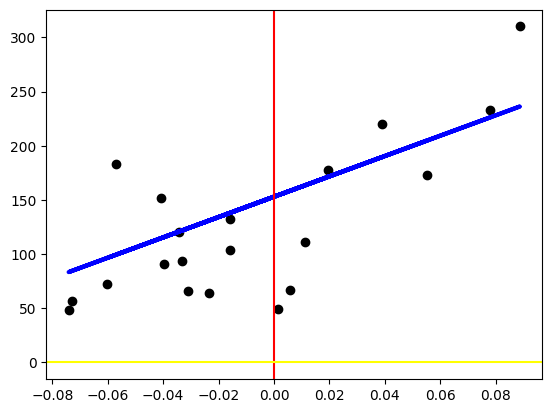

In [12]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.axvline(x=0, c="red", label="x=0")
plt.axhline(y=0, c="yellow", label="y=0")

plt.show()

## Linear Regression without intercept

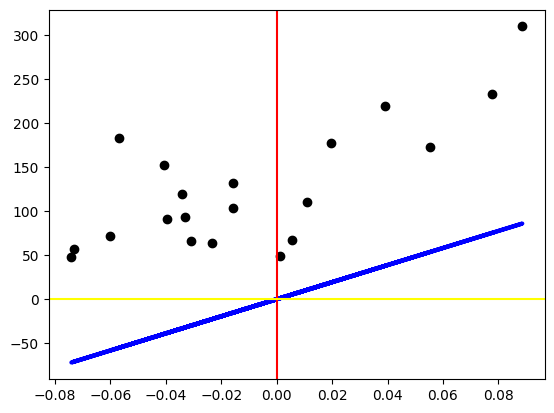

In [13]:
# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.axvline(x=0, c="red", label="x=0")
plt.axhline(y=0, c="yellow", label="y=0")

plt.show()

# Ridge Regression

Ridge regression imposes an $l_2$ penalty on the coefficients to solve the high variance problem in data sparse scenarios. Mathematically, it solve the following problem:
$$\underset{\mathbf{w}, w_o}{\text{min}}\quad ||\mathbf{y} - X\mathbf{w} -w_0\mathbf{1}||_2^2 + \alpha ||\mathbf{w}||_2^2$$
The complexity (aka regularization) hyper-parameter $\alpha \ge 0$ controls the amount of shrinkage. The larger the value of $\alpha$, the greater the amount of shrinkage and thus, the coefficients become more robust to colinearity in the data. Scikit-learn provide the class <em>sklearn.linear_model.Ridge</em> for performing ridge regression. The full documentation of the same can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge).

### A small example

In [14]:
reg = linear_model.Ridge(alpha=.5)

X = np.array([[0, 0], [0, 0], [1, 1]])
y = np.array([0, .1, 1])

reg.fit(X, y)

Ridge(alpha=0.5)

In [15]:
print(reg.coef_)
print(reg.intercept_)

[0.34545455 0.34545455]
0.13636363636363638


## Ordinary Linear regression vs. Ridge regression
Code source: Gaël Varoquaux

Modified for documentation by Jaques Grobler

License: BSD 3 clause


## Creating the dataset

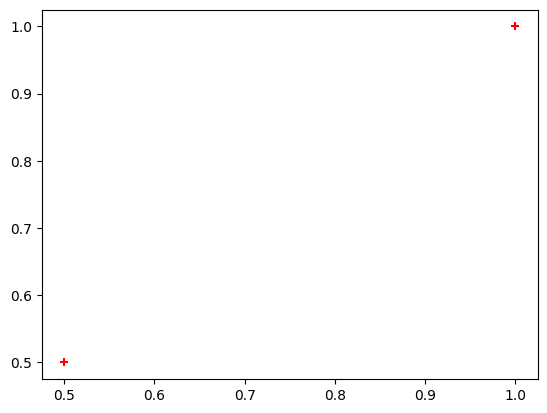

In [16]:
X_train = np.c_[0.5, 1].T
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

plt.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)
plt.show()

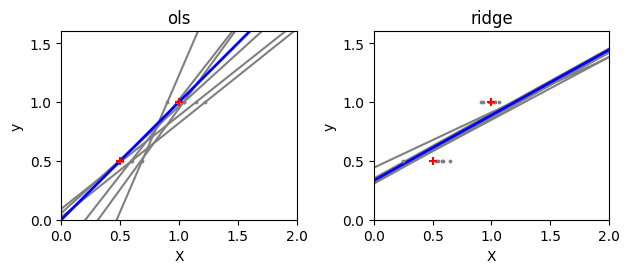

In [17]:
np.random.seed(0)

classifiers = dict(
    ols=linear_model.LinearRegression(), ridge=linear_model.Ridge(alpha=0.1)
)

fig, axs = plt.subplots(1, 2)
for i, (name, clf) in enumerate(classifiers.items()):
    #plt.subplot(1, 2, i+1)
    #fig, ax = plt.subplots(1, 2, 1, figsize=(4, 3))

    for _ in range(6):
        this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        axs[i].plot(X_test, clf.predict(X_test), color="gray")
        axs[i].scatter(this_X, y_train, s=3, c="gray", marker="o", zorder=10)

    clf.fit(X_train, y_train)
    axs[i].plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
    axs[i].scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

    axs[i].set_title(name)
    axs[i].set_xlim(0, 2)
    axs[i].set_ylim((0, 1.6))
    axs[i].set_aspect(1)
    axs[i].set_xlabel("X")
    axs[i].set_ylabel("y")

fig.tight_layout()

plt.show()

# Lasso
Lasso is a linear model which uses $l_1$ penalty on the coefficients to obtain a sparse solutions (i.e. only a few of the coefficints will be non-zeros while rest of those will be zero). Since, Lasso outputs a sparse solution, it is used for selecting the important features (aka <em> feature selection</em>). Mathematically, Lasso solves the following problem:
$$\underset{\mathbf{w}, w_0}{\text{min}}\quad ||\mathbf{y} - X\mathbf{w} -w_0\mathbf{1}||_2^2 + \alpha||\mathbf{w}||_1$$
where $||\mathbf{w}||_1=\sum_{i=1}^p |w_i|$ is the $l_1$ norm of $\mathbf{w}$. Larger the value of $\alpha$, the complexity (aka regularization) hyper-parameter, sparser the coefficients are. Scikit-learn provide the class <em>sklearn.linear_model.Lasso</em> for performing Lasso. The full documentation of the same can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso).

## A small example

In [18]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
print(clf.coef_)
print(clf.intercept_)

[0.85 0.  ]
0.15000000000000002


## Feature Selection using Lasso
The code is taken from [this source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html#sphx-glr-auto-examples-linear-model-plot-lasso-and-elasticnet-py).

### Data Generation
The training data $X$ is a $2000\times 100$ dimensional matrix whose entries are Gaussian random. In other words, there are $2000$ examples in the train set and the each example of the train set is a $100$ dimensional vector. The target labels are generated using the linear model
$$\mathbf{y}=X\mathbf{w} + \epsilon$$
where the value of $w_i$ decreases exponentially with the increase in the index $i$.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

np.random.seed(42)

n_samples, n_features = 2000, 100
X = np.random.randn(n_samples, n_features)

# Decreasing coef w. alternated signs for visualization
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
#coef[10:] = 0  # sparsify coef
y = np.dot(X, coef)

# Add noise
y += 0.01 * np.random.normal(size=n_samples)

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[: n_samples // 2], y[: n_samples // 2]
X_test, y_test = X[n_samples // 2 :], y[n_samples // 2 :]

In [20]:
print(coef[:20])

[ 1.         -0.90483742  0.81873075 -0.74081822  0.67032005 -0.60653066
  0.54881164 -0.4965853   0.44932896 -0.40656966  0.36787944 -0.33287108
  0.30119421 -0.27253179  0.24659696 -0.22313016  0.20189652 -0.18268352
  0.16529889 -0.14956862]


<ipython-input-21-842ffd9ad26e>:1: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(


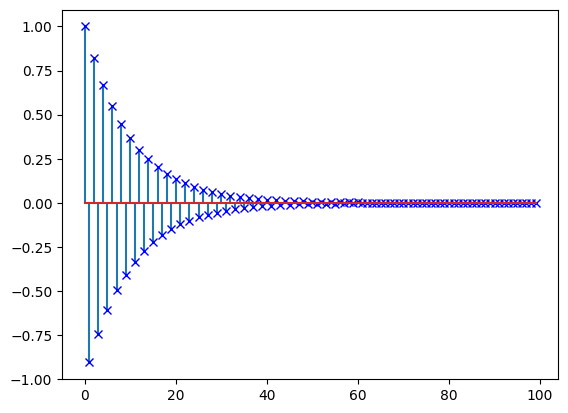

In [21]:
plt.stem(
    np.where(coef)[0],
    coef[coef != 0],
    label="true coefficients",
    markerfmt="bx",
    use_line_collection=True,
)
plt.show()

### Fit the model using Lasso

In [26]:
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1)
r^2 on test data : 0.943234


### Plot coefficients

<ipython-input-27-4e44a8e25de1>:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  m, s, _ = plt.stem(
<ipython-input-27-4e44a8e25de1>:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  m, s, _ = plt.stem(


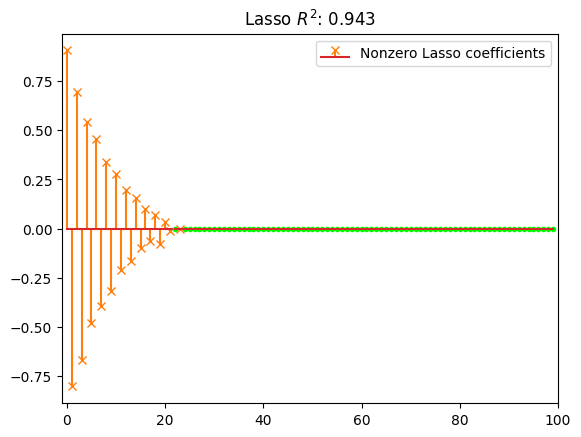

In [27]:
if np.sum(lasso.coef_ != 0) > 0:
  m, s, _ = plt.stem(
    np.where(lasso.coef_)[0],
    lasso.coef_[lasso.coef_ != 0],
    markerfmt="x",
    label="Nonzero Lasso coefficients",
    use_line_collection=True,
  )
  plt.setp([m, s], color="#ff7f0e")

if np.sum(lasso.coef_ == 0) > 0:
  m, s, _ = plt.stem(
    np.where(lasso.coef_ == 0)[0],
    lasso.coef_[lasso.coef_ == 0],
    markerfmt=".",
    use_line_collection=True,
  )
  plt.setp([m, s], color="#00ff00")

plt.legend(loc="best")
plt.title(
    "Lasso $R^2$: %.3f" % (r2_score_lasso)
)
plt.xlim([-1, n_features])
#plt.axvline(x=0, c="red", label="x=0")
plt.show()

# Polynomial Regression
Linear regression is a very commonly used technique in machine larning as there exists many efficient algorithm to solve those. Also, many variations of linear regression problems exhibit strong theoretical guarantee. However, since linear model can capture the linear relationship between input and output, they are only useful for a limited applications.  One way to extent the applicability of linear regression to non-linear problems while maintaining its advantages like efficiency, theoretical guarantee etc. is to non-linearly convert the original features of the data into some higher dimensional feature space, and then perform the linear regression in the new feature space.

For example, we are given a training set having two features $\mathbf{x}=(x_1, x_2)$. Using a linear model, we will only be able to learn a function of the form $$\hat{y}(\mathbf{x};\mathbf{w}, w_0) = w_0 + w_1x_1 + w_2x_2$$. But, we can increase the complexity of the function class (i.e. machine learning model) by considering features from the second order polynomial of the original features:
$$\hat{y}(\mathbf{x};\mathbf{w}, w_0) = w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2 + w_4x_1^2 + w_5x_2^2$$. Interestingly, the above model is a linear model in a new feature space
$$\mathbf{z}=(x_1, x_2, x_1x_2, x_1^2, x_2^2)$$.
Thus, relabelling the features, we can re-write the new classifier as linear classifier as follows:
$$\hat{y}(\mathbf{z};\mathbf{w},w_0)=w_0 + w_1z_1 + w_2z_2 + w_3z_3 + w_4z_4 + w_5z_5$$.
Thus, the resultant polynomial regression can be solved using linear regression in the new feature space. Scikit-learn provides a feature transformer class called <em>sklearn.preprocessing.PolynomialFeatures</em> for generating polynomial features. The full documentation of the same can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures).

## An Example of Polynomial Feature Transformation
The code snippet is taken from [this sourse](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures)

### Importing the module

In [29]:
from sklearn.preprocessing import PolynomialFeatures

### Generating 2-dimensional data

In [30]:
X = np.arange(6).reshape(3, 2)
print(X)

[[0 1]
 [2 3]
 [4 5]]


### Transforming using Polynomial Feature Transformer

In [31]:
poly = PolynomialFeatures(degree=2)
X_bar = poly.fit_transform(X)
print(X_bar)

[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


In [32]:
poly = PolynomialFeatures(interaction_only=True)
X_bar = poly.fit_transform(X)
print(X_bar)

[[ 1.  0.  1.  0.]
 [ 1.  2.  3.  6.]
 [ 1.  4.  5. 20.]]


## Pipelining for Regression using Polynomial Feature
The above preprocessing can be streamlined using the [Pipeline](https://scikit-learn.org/stable/modules/compose.html#pipeline) tool. The code snippet below pipelines a polynomial feature transformer with a linear regressor to create a polynomial regressor.

### Importing the Pipeline module

In [33]:
from sklearn.pipeline import Pipeline

### Pipelining the feature transformer with linear regressor

In [35]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', linear_model.LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_

array([ 3., -2.,  1., -1.])

## Polynomial Interpolation

In this tutorial, we generate training samples from the line $y = x\cdot\text{sin}(x)$. Then we try to find the interpolating line which best fits the data using polynomial regression. The code snippet is taken from [this source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py).





### Data Generation

In [36]:
def f(x):
    """Function to be approximated by polynomial interpolation."""
    return x * np.sin(x)

# whole range we want to plot
x_plot = np.linspace(-1, 11, 100)

x_train = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
x_train = np.sort(rng.choice(x_train, size=20, replace=False))
y_train = f(x_train)

# create 2D-array versions of these arrays to feed to transformers
X_train = x_train[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

### Ploting the data

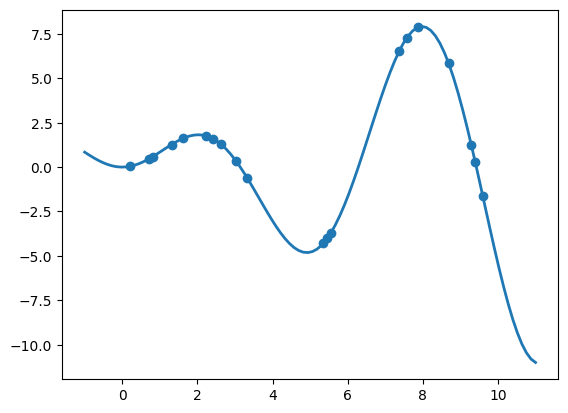

In [37]:
plt.plot(x_plot, f(x_plot), linewidth=2, label="ground truth")
plt.scatter(x_train, y_train, label="training points")
plt.show()

### Performing the polynomial interpolation on the data



In [38]:
from sklearn.pipeline import make_pipeline

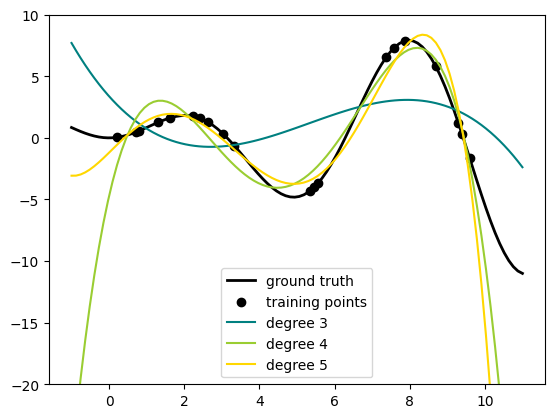

In [39]:
# plot function
lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen", "gold", "darkorange"]
)
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

# plot training points
ax.scatter(x_train, y_train, label="training points")

# polynomial features
for degree in [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), linear_model.Ridge(alpha=1e-3))
    model.fit(X_train, y_train)
    y_plot = model.predict(X_plot)
    ax.plot(x_plot, y_plot, label=f"degree {degree}")

ax.legend(loc="lower center")
ax.set_ylim(-20, 10)
plt.show()

## Bias-Variance Trade-off
When the number of training samples are limited, a simpler model finds a solution which has high bias and low variance. On the other hand, a more complex model finds a solution which has low bias and high variance. In this tutorial, we will verify the fact in the context of polynomial regression.
The code snippet is taken from [this source](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py).

### Generate the dataset
The data is sampled from the model $y = \text{cos}(3/2\pi x) + \epsilon$ where $x$ is the input and $\epsilon$ is the Gaussian noise.

In [40]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

### Plotting the data

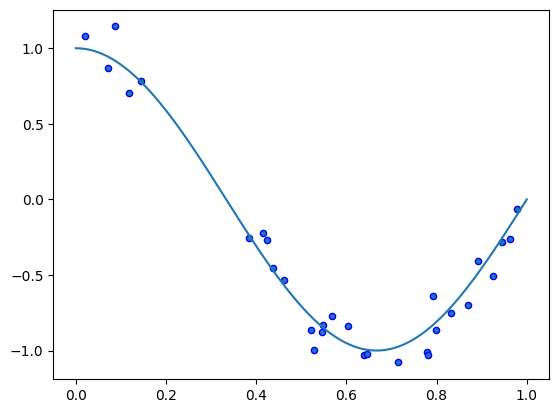

In [41]:
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
plt.show()

### Performing the polynomial regression for various degree of polynomial

In [42]:
from sklearn.model_selection import cross_val_score

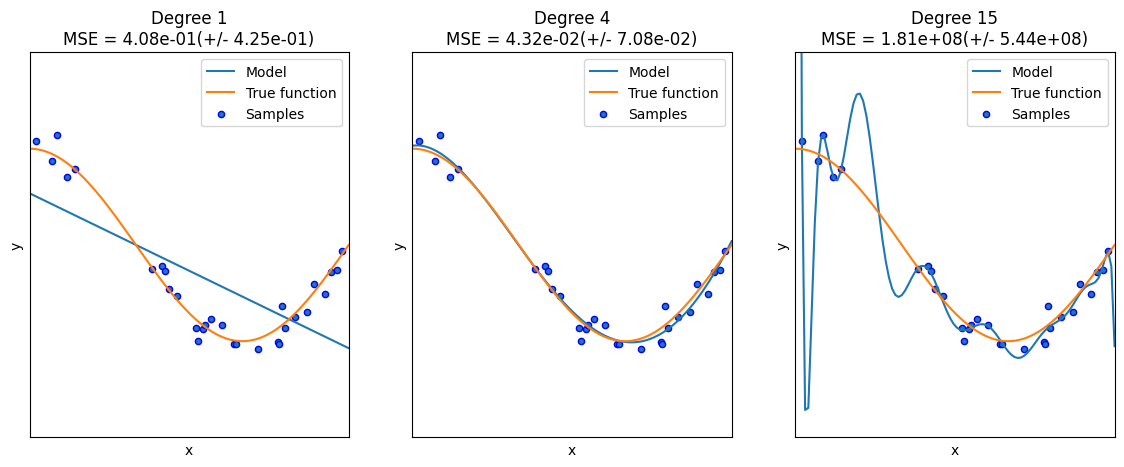

In [43]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = linear_model.LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()